# Heart Disiease Data Analysis


We are going to follow this approach.

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experiments

## 1. Problem Definition
What Problems are we trying to solve.?
. As heart disease is a binary problem i.e. contains heart disease or not. Thus this is a classification problem

## 2. Data
What data do we have.?

. original data set can be found at this site https://archive.ics.uci.edu/ml/datasets/Heart+Disease

. there is also an dataset at kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
What defines the success.?

. accuracy > 95%
 
## 4. Features
What features should we model.?

Complete attribute documentation:
1. age in years
2. sex (1 = male; 0 = female) 
3. cp: chest pain type
     1. Value 1: typical angina
     2. Value 2: atypical angina
     3. Value 3: non-anginal pain
     4. Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. estecg: resting electrocardiographic results
     1. Value 0: normal
     2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation           or depression of > 0.05 mV)
     3. Value 2: showing probable or definite left ventricular hypertrophy by Estes'          criteria 
8. thalach: maximum heart rate achieved      
9. exang: exercise induced angina (1 = yes; 0 = no)   
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment
    1. Value 1: upsloping
    2. Value 2: flat
    3. Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 
    1. 3 = normal; 
    2. 6 = fixed defect; 
    3. 7 = reversable defect 
14.  num: diagnosis of heart disease (angiographic disease status)
    1. Value 0: < 50% diameter narrowing
    2. Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

## Modeling
What model are we going to use?

1. We have refered sklearn map for this process

## Experiments
How can we optimize our model?

1. By increasing the data
2. By performing data mining
3. By tuning hyper parameters of existing model

In [1]:
""" 
Importing libraries
"""

#Import regular RDA and matplotlib libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Used for displaying in document graphs
%matplotlib inline

#importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#importing evaluation metrics
from sklearn.metrics import (accuracy_score, f1_score, 
                             roc_curve, classification_report,
                            confusion_matrix) #plot_roc_curve)
from sklearn.model_selection import (train_test_split, RandomizedSearchCV,
                                     GridSearchCV, cross_val_score)


In [2]:
#load dataset
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape # (rows, columns)

(303, 14)

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
### Performing step 2
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


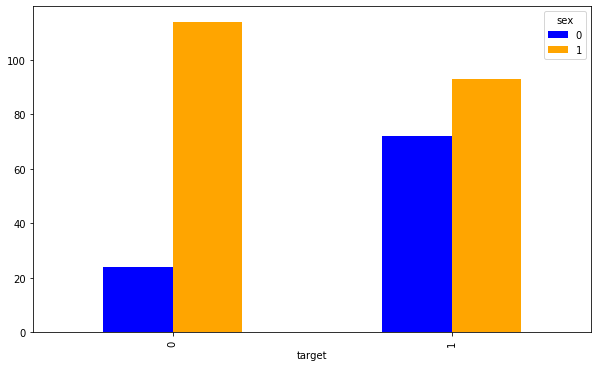

In [7]:
#visualizing the above step
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['blue', 'orange']);


#### comparing age vs chest pain (cp) 

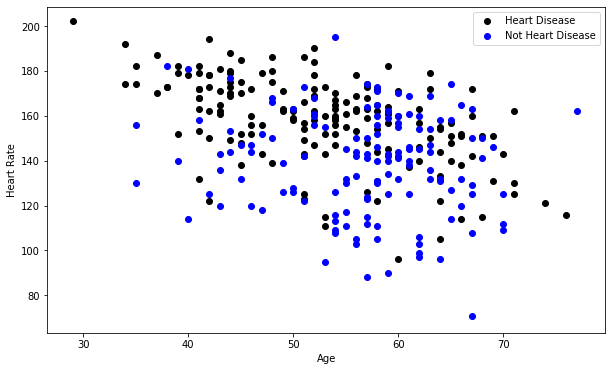

In [8]:
#create anohter figure
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c='black')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')

plt.legend(['Heart Disease', 'Not Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Rate');

In [9]:
df.age[df.target == 1]

0      63
1      37
2      41
3      56
4      57
5      57
6      56
7      44
8      52
9      57
10     54
11     48
12     49
13     64
14     58
15     50
16     58
17     66
18     43
19     69
20     59
21     44
22     42
23     61
24     40
25     71
26     59
27     51
28     65
29     53
       ..
135    49
136    60
137    62
138    57
139    64
140    51
141    43
142    42
143    67
144    76
145    70
146    44
147    60
148    44
149    42
150    66
151    71
152    64
153    66
154    39
155    58
156    47
157    35
158    58
159    56
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [10]:
corr_df = df.corr()

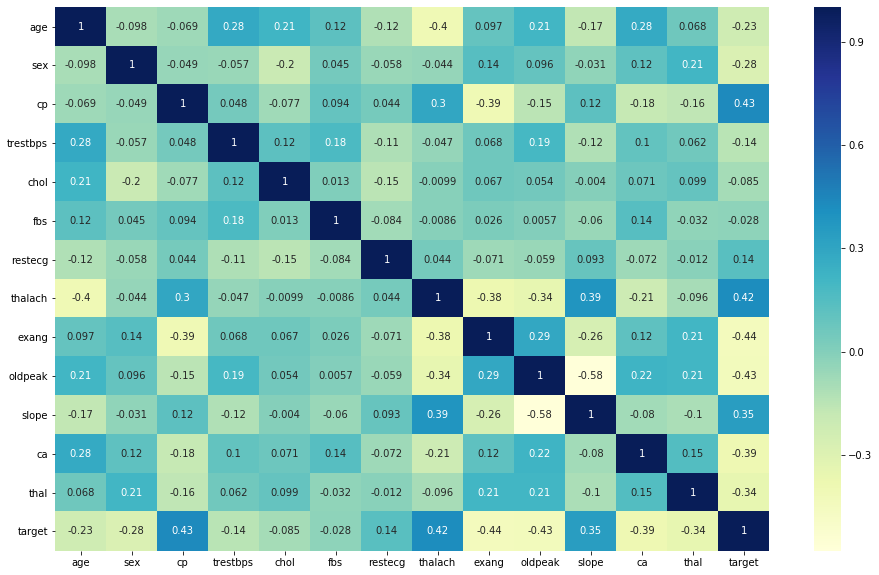

In [11]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_df, annot=True, cmap='YlGnBu');

## Let's start Modeling Phase
We're going to use three models in this project.

* Logistic Regression
* K Nearest Neighbors
* Random Forest Classifier

In [12]:
"""
Creating a overall fucntion for finding model's evaluation metrices
"""

#creating a dictionary of models that we'er going to use in our research

models_dict = {
    'Logistic Regression': LogisticRegression(solver='warn'),
    'KNN': KNeighborsClassifier(),
    'Random Forest Classifer': RandomForestClassifier(n_estimators=10),
    'SVM': svm.SVC(gamma='auto')
}

#creating our model evaluation function

def model_eval_func(models_dict, X_train, X_test, y_train, y_test):
    train_score = {}
    test_score = {}
    
    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        train_score[name] = model.score(X_train, y_train)
        test_score[name] = model.score(X_test, y_test)
    
    return train_score, test_score

np.random.seed(24)

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_train_scores, model_test_scores = model_eval_func(models_dict,
                                                       X_train,
                                                       X_test,
                                                       y_train,
                                                       y_test)

C:\Users\Inam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print(f"""Test Scores : {model_test_scores}\n\n\nTrain Scores : {model_train_scores}""")

Test Scores : {'Logistic Regression': 0.8852459016393442, 'KNN': 0.6721311475409836, 'Random Forest Classifer': 0.8032786885245902, 'SVM': 0.5409836065573771}


Train Scores : {'Logistic Regression': 0.8429752066115702, 'KNN': 0.7272727272727273, 'Random Forest Classifer': 0.9917355371900827, 'SVM': 1.0}


In [14]:
models_df = pd.DataFrame(model_test_scores, index=[0])

In [ ]:
## Tuning different parameters of our SVM model
kernals = ['linear', 'poly', 'sigmoid']
    
    
for kernal in kernals:
    clf = svm.SVC(kernel=kernal).fit(X_train, y_train)
    print(f'with {kernal} the accuracy is {clf.score(X_test, y_test)*100:2f}')
    

with linear the accuracy is 85.245902


C:\Users\Inam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### using randomized search CV on the logistic Regression and Random Forest Classifier

In [2]:
#preparing the grid for Logistic Regression
# log_reg_grid = {'C' : np.logspace(0, 10, 20),
#                 'solver': ['liblinear']}

# #preparing the grid for Random Forest Classifier
# rand_clf_grid = {'n_estimators': np.arange(10, 1000, 50),
#                  'criterion': ['gini', 'entropy'],
#                  'max_depth': np.arange(10, 100, 10)}

# #now preparing our models and fit them to be inserted into the Randomized Search Module
# reg_clf = LogisticRegression()
# reg_clf_random = RandomizedSearchCV(reg_clf, 
#                                     param_distributions=log_reg_grid,
#                                     n_iter=20)

In [17]:
reg_clf_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                                        'solver': ['liblinear']})

In [ ]:
reg_clf_random.score(X_test, y_test)

In [19]:
reg_clf_random.best_params_

{'solver': 'liblinear', 'C': 3.3598182862837818}

In [3]:
#Now the same process for Random Forest Classifier
# rand_clf = RandomForestClassifier()
# rand_clf_random = RandomizedSearchCV(rand_clf, 
#                                     param_distributions=rand_clf_grid,
#                                     n_iter=20,
#                                     cv=5)

# rand_clf_random.fit(X_train, y_train)


In [4]:
# rand_clf_random.score(X_test, y_test)

In [ ]:
rand_clf_random.best_params_

In [22]:
#fitting the different models with best parameters for visualization
SVM_clf = svm.SVC(kernel='linear').fit(X_train, y_train)
reg_clf.set_params(solver='liblinear', C=3.3598182862837818).fit(X_train, y_train)
# rand_clf.set_params(n_estimators=810, max_depth=80).fit(X_train, y_train)

LogisticRegression(C=3.3598182862837818, solver='liblinear')

In [5]:
# scores_df = pd.DataFrame({'Support Vector Machine': SVM_clf.score(X_test, y_test),
#                          'Logistic Regression': reg_clf.score(X_test, y_test),
#                          'Random Forest Classifier': rand_clf.score(X_test, y_test)},
#                         index=[0])
# scores_df.T.plot(kind='bar',
#               cmap='RdPu_r',
#               legend='Models',
#               figsize=(10, 6))

### Evaluation Matrix

Things we're going to review

* Accuracy
* Precission
* Recall
* F1-score

In [24]:
## cross val score for Logistic Regression Model
np.mean(cross_val_score(reg_clf, X_test, y_test, scoring='precision', cv=5))

0.8523809523809524

In [25]:
## cross val score for Random Forest Classifier model
np.mean(cross_val_score(rand_clf, X_test, y_test, scoring='precision', cv=5))

0.8428571428571429

In [26]:
## cross val score of Support Vector Machine model
np.mean(cross_val_score(SVM_clf, X_test, y_test, scoring='precision', cv=5))

0.8345238095238094

In [27]:
### Let's work with Logistic Regression Model for the time being
y_preds = reg_clf.predict(X_test)
pd.crosstab(y_test, y_preds, rownames=['Original Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Original Labels,,
0,23,6
1,2,30


In [28]:
## here's the classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.83      0.94      0.88        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



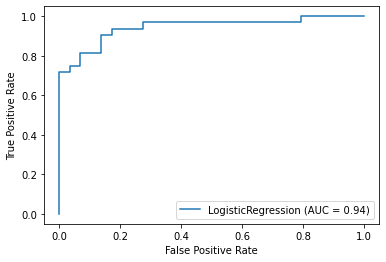

In [29]:
plot_roc_curve(reg_clf, X_test, y_test);

In [31]:
reg_clf.coef_

array([[ 0.00242463, -1.72092232,  0.79023893, -0.01184957, -0.0040103 ,
         0.25764232,  0.45367   ,  0.02708949, -0.89144506, -0.4826608 ,
         0.71028597, -0.59273281, -0.89892293]])

In [33]:
coefficient_df = pd.DataFrame(data=reg_clf.coef_, 
                              columns=X.columns,
                             index=[0])

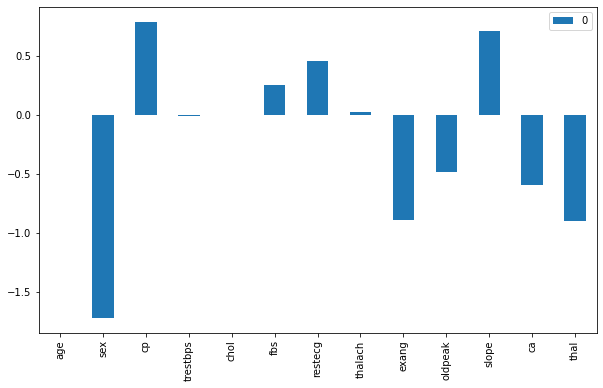

In [43]:
coefficient_df.T.plot(kind='bar',
                     figsize=(10, 6),
                     legend=(['Attributes']));
# plt.set_legend(['Attributes'])